## Length distribution comparison

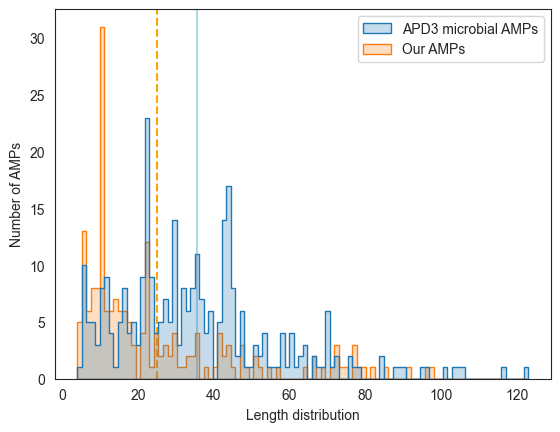

<Figure size 640x480 with 0 Axes>

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input databases length distributions
apd3 = pd.read_csv("./prok_APD_sequence_release_09142020.fasta_length_complete.txt")

amps = pd.read_csv("./193_amps.pep_length_complete.txt")

both_datasets = pd.concat([apd3, amps], axis=1)

# Histogram
sns.set_style("white")
sns.histplot(
    data=both_datasets,
    bins=100,
    element="step",
    common_norm=False)
plt.xlabel("Length distribution")
plt.ylabel("Number of AMPs")

# Draw lines indicating the means
plt.axvline(x=35.49, color='lightblue', linestyle='-', zorder=0)
plt.axvline(x=24.97, color='orange', linestyle='--', zorder=0)

plt.savefig("length_distribution.svg")
plt.savefig("length_distribution.png")
plt.show()
plt.clf()

## Aminoacids composition comparison

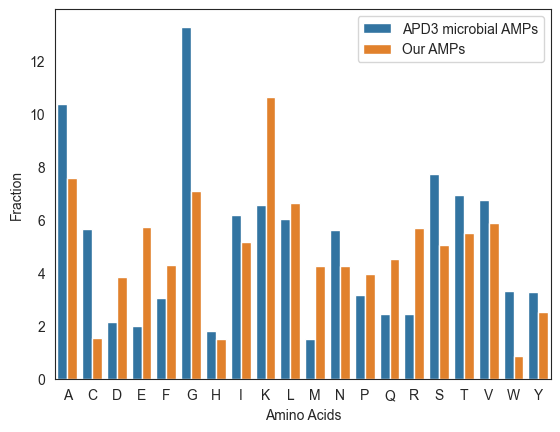

<Figure size 640x480 with 0 Axes>

In [2]:
# Input amino acid composition
both_datasets = pd.read_csv("./both_datasets_aa_composition.tsv", sep="\t")

# id_vars=[('A', 'D')], value_vars=[('B', 'E')]
both_datasets = pd.melt(
    both_datasets, id_vars="aa", value_vars=["APD3 microbial AMPs", "Our AMPs"]
)

# Barplot
sns.set_style("white")
sns.barplot(data=both_datasets, x="aa", y="value", hue="variable")
plt.legend(title="")
plt.xlabel("Amino Acids")
plt.ylabel("Fraction")
plt.savefig("aa_distribution.svg")
plt.savefig("aa_distribution.png")
plt.show()
plt.clf()

## GRAVY and net charge

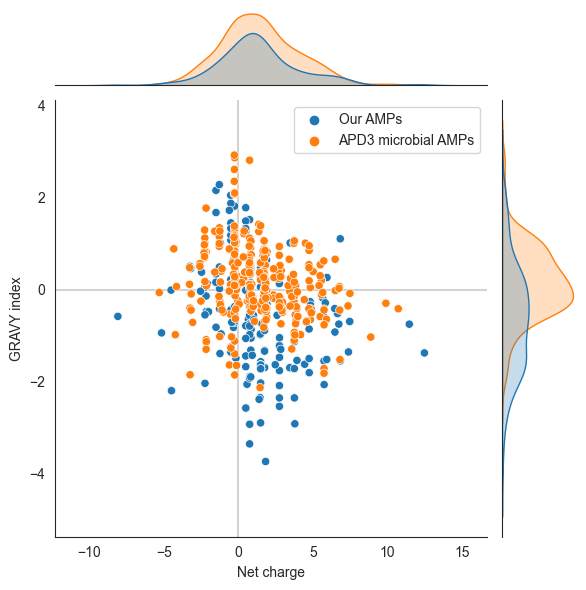

<Figure size 640x480 with 0 Axes>

In [4]:
# Input amino acid composition
both_datasets = pd.read_csv("./both_datasets_gravy_net_charge.tsv", sep="\t")

# Jointplot
sns.set_style("white")
sns.jointplot(data=both_datasets, x="Net charge at pH 7", y="GRAVY index", hue="group")
plt.legend(title="")
plt.xlabel("Net charge")
plt.ylabel("GRAVY index")

# Draw a line at x=0 and y=0
plt.axhline(y=0, color='lightgray', linestyle='-', zorder=0)
plt.axvline(x=0, color='lightgray', linestyle='-', zorder=0)

plt.savefig("gravy_net_charge_distribution.svg")
plt.savefig("gravy_net_charge_distribution.png")
plt.show()
plt.clf()